In [0]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns

In [0]:
dataset = pd.read_csv('o_ring.csv')

In [0]:
dataset

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


In [0]:
dataset.describe()

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
count,23.0,23.000000,23.000000,23.000000,23.00000
mean,6.0,0.304348,69.565217,152.173913,12.00000
std,0.0,0.558796,7.057080,68.221332,6.78233
min,6.0,0.000000,53.000000,50.000000,1.00000
25%,6.0,0.000000,67.000000,75.000000,6.50000
50%,6.0,0.000000,70.000000,200.000000,12.00000
75%,6.0,0.500000,75.000000,200.000000,17.50000
max,6.0,2.000000,81.000000,200.000000,23.00000


In [0]:
dataset.isnull().any()

o_ring_ct          False
O.ring.failures    False
temperature        False
pressure           False
launch_id          False
dtype: bool

In [0]:
x = dataset.iloc[:,2:5]
y = dataset.iloc[:,1:2]

In [0]:
x

,temperature,pressure,launch_id
0,66,50,1
1,70,50,2
2,69,50,3
3,68,50,4
4,67,50,5
5,72,50,6
6,73,100,7
7,70,100,8
8,57,200,9
9,63,200,10


In [0]:
y

,O.ring.failures
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [0]:
x.shape

(23, 3)

In [0]:
y.shape

(23, 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c27303f60>,
      dtype=object)

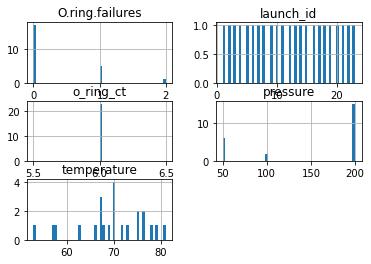

In [0]:
dataset.hist(bins = 50)

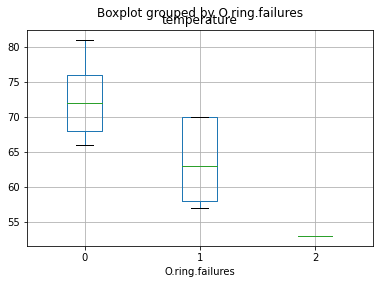

In [0]:
dataset.boxplot(column='temperature', by = 'O.ring.failures')

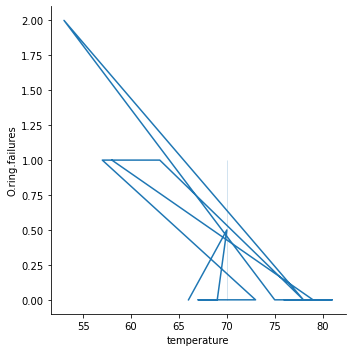

In [0]:
t = sns.relplot(x = 'temperature', y = 'O.ring.failures', kind = 'line', sort = False, data = dataset)

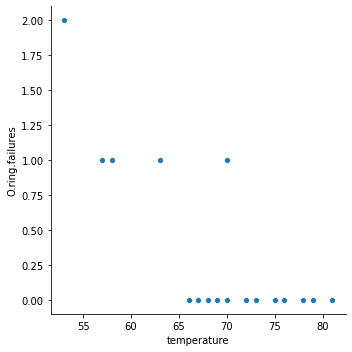

In [0]:
sns.relplot(x="temperature", y="O.ring.failures", data=dataset)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [0]:
x_train

,temperature,pressure,launch_id
16,70,200,17
10,70,200,11
4,67,50,5
2,69,50,3
18,76,200,19
6,73,100,7
7,70,100,8
1,70,50,2
14,67,200,15
0,66,50,1


In [0]:
x_train.shape

(18, 3)

In [0]:
y_train.shape

(18, 1)

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predict = regressor.predict(x_test)

In [0]:
predict

array([[-0.05324931],
       [-0.25371093],
       [ 0.19326504],
       [ 1.0935033 ],
       [-0.20976409]])

In [0]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, predict)

In [0]:
accuracy * 100

69.67833319422053

In [0]:
y = regressor.predict([[1,76,68]])

In [0]:
y

array([[1.81319182]])

In [0]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

Mean Absolute Error: 0.3232972136665813
Mean Squared Error: 0.19405866755698875
Root Mean Squared Error: 0.44052090478998696
